In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, ggh4x, ggthemes, ggridges, cowplot) 

# Functions

In [3]:
baseplot.fx <- function(df, x, y, clr, clr_palette, sampletype) {
  if (sampletype == "PBMC") {
    mybreaks <- c(1, 10, 100, 500, 1000, 1500)
  } else {
    mybreaks <- c(1, 10, 50, 100)
  }
  myp <- ggplot(
    df,
    aes(x = eval(as.name(x)), y = eval(as.name(y)))
  ) +
    geom_boxplot() + #
    geom_beeswarm(aes(color = eval(as.name(clr))), cex = 2) +
    scale_color_manual(values = clr_palette) +
    myplot +
    myaxis +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.title.x = element_blank()) +
    annotation_logticks(sides = "l") +
    scale_y_continuous(breaks = log10(mybreaks), labels = mybreaks)
  return(myp)
}


In [4]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
dim(meta_div)

[1] 832  66

In [9]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [10]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

In [11]:
#meta_div$log10shann <- log10(meta_div$observed_Shannon)

# Ridge plots

In [12]:
meta_div <- meta_div[ meta_div$cycle != "X00",]

In [13]:
tmp <- meta_div[ meta_div$cycle == "X01", ]

In [14]:
tapply(tmp$log10shann[tmp$sampletype == "cfDNA"], 
tmp$cancergroup[tmp$sampletype == "cfDNA"], median)

Leukemia            Lymphoma        Solid tumors T-cell malignancies 
        0.584683044         0.657676226         0.605267606         0.009025742

In [15]:
meta_div <- meta_div[ meta_div$cancergroup != "T-cell malignancies" ,] 

In [16]:
table(meta_div$Disease_type)


   ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB     HD 
    99     45      6     21      9     13     11     19     34     16     34 
HR ALL  MS NB     NB     OS  PMBCL SR ALL  WILMS 
    53      1     12     46      7      7      6 

In [17]:
meta_div$cancergroup <- factor(meta_div$cancergroup, levels = c("Solid tumors", "Leukemia", "Lymphoma"))

In [18]:
mybreaks <- c(1,10,100, 1000)

In [19]:
summary(meta_div$log10shann)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5319  1.0475  1.1892  1.8526  3.1838 

In [20]:
meta_div$type <- "TCR diversity (CapTCR-seq)"

In [21]:
meta_div$sampletype <- factor(meta_div$sampletype, levels = c("PBMC", "cfDNA"))

In [22]:
meta_div$cycle <- factor(meta_div$cycle, levels = c("X05", "X04", "X03", "X02", "X01"))

In [23]:
myp <- ggplot(meta_div, aes(x = log10shann, y = cycle, fill = cancergroup)) +
  geom_density_ridges(
    alpha = 0.4, from = 0, to = 3.18,
    scale = 1,
    panel_scaling = TRUE,
    quantile_lines = FALSE, size = 0.2,
    jittered_points = TRUE, point_shape = "|", point_size = 3,
    position = position_points_jitter(height = 0)
  ) +
  scale_x_continuous(breaks = log10(mybreaks), labels = mybreaks) +
  annotation_logticks(sides = "b", size = 0.3) +
  facet_nested(cancergroup ~ type + sampletype, nest_line = element_line(linetype = 1), axes = "all", remove_labels = "all") +
  theme(
    axis.text.y = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(colour = "#7f7f7f2a"),
    panel.background = element_blank(),
    panel.spacing = unit(.5, "lines"),
    panel.border = element_blank(),
    axis.title = element_blank(),
    axis.line = element_line(),
    legend.position = "none",
    strip.background = element_blank(),
    strip.placement = "outside",
    strip.text.y = element_blank(),
    ggh4x.facet.nestline = element_line(colour = "black", linewidth = 0.3)
  )


In [24]:
pdf(paste0(plotpath, "TCR_div_facet_ridges.pdf"), width = 4, height = 9, onefile = FALSE)
myp
dev.off()

Picking joint bandwidth of 0.305



Picking joint bandwidth of 0.211

Picking joint bandwidth of 0.232

Picking joint bandwidth of 0.189

Picking joint bandwidth of 0.244

Picking joint bandwidth of 0.165



pdf 
  2

stats

In [25]:
pbmc <- meta_div[meta_div$sampletype == "PBMC",]
cfdna <- meta_div[meta_div$sampletype == "cfDNA",]

In [26]:
tmp <- cfdna[ cfdna$cycle == "X01", ]

In [27]:
tapply(tmp$log10shann, tmp$cancergroup, summary)

$`Solid tumors`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.6053  0.5537  0.8863  1.5303 

$Leukemia
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2358  0.5847  0.6081  0.9781  1.4804 

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4447  0.5668  0.6577  0.8491  0.9269  1.6508 


In [28]:
mytest <- "log10shann"
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Solid tumors")], tmp[[mytest]][ which(tmp$cancergroup == "Lymphoma")])
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Solid tumors")], tmp[[mytest]][ which(tmp$cancergroup == "Leukemia")])
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Lymphoma")], tmp[[mytest]][ which(tmp$cancergroup == "Leukemia")])


	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Solid tumors")] and tmp[[mytest]][which(tmp$cancergroup == "Lymphoma")]
D = 0.4375, p-value = 0.1428
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Solid tumors")] and tmp[[mytest]][which(tmp$cancergroup == "Leukemia")]
D = 0.14423, p-value = 0.9423
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Lymphoma")] and tmp[[mytest]][which(tmp$cancergroup == "Leukemia")]
D = 0.38462, p-value = 0.1825
alternative hypothesis: two-sided


In [29]:
tmp <- cfdna[ cfdna$cancergroup == "Lymphoma", ]

In [30]:
tapply(tmp$log10shann, tmp$cycle, summary)

$X05
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2956  0.3181  0.4764  0.7448  1.1866 

$X04
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.09616 0.45251 0.42778 0.72329 0.90162 

$X03
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1477  0.2076  0.2463  0.3943  0.5437 

$X02
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2244  0.4136  0.4537  0.7358  0.9340 

$X01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4447  0.5668  0.6577  0.8491  0.9269  1.6508 


In [31]:

mytest <- "log10shann"
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X02")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X03")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X03")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X03")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X03")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X04")], tmp[[mytest]][ which(tmp$cycle == "X05")])


	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X02")]
D = 0.5, p-value = 0.1678
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X03")]
D = 0.82308, p-value = 0.0003077
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.5, p-value = 0.1678
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.56667, p-value = 0.07463
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X03")]
D = 0.42308, p-value = 0.193
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.2, p-value = 0.9917
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.27778, p-value = 0.7396
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X03")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.5, p-value = 0.07744
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X03")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.47009, p-value = 0.1392
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X04")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.28889, p-value = 0.6914
alternative hypothesis: two-sided


Separate PBMC and cfDNA

In [32]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [33]:
# names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

## rms

In [34]:
pacman::p_load(rms)

In [35]:
dd <- datadist(pbmc[ , c("cycle", "Disease_type", "Age", "log10shann", "cancergroup", "agegroup")])
options(datadist="dd")

In [36]:
options(prType="plain")

In [37]:
f <- ols(log10shann ~ cycle + cancergroup + Age, data = pbmc)


In [38]:
f

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + Age, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     188    LR chi2     23.57    R2       0.118    
sigma0.5685    d.f.            7    R2 adj   0.084    
d.f.    180    Pr(> chi2) 0.0014    g        0.231    

Residuals

     Min       1Q   Median       3Q      Max 
-1.65779 -0.34825  0.02266  0.40561  1.38288 


                     Coef    S.E.   t     Pr(>|t|)
Intercept             2.0439 0.1250 16.35 <0.0001 
cycle=X04            -0.1231 0.1453 -0.85 0.3978  
cycle=X03            -0.1642 0.1334 -1.23 0.2199  
cycle=X02             0.1344 0.1336  1.01 0.3158  
cycle=X01            -0.1925 0.1334 -1.44 0.1508  
cancergroup=Leukemia  0.1662 0.0940  1.77 0.0787  
cancergroup=Lymphoma -0.0692 0.1345 -0.51 0.6073  
Age                  -0.0163 0.0075 -2.18 0.0308  


In [39]:
anova(f)

,d.f.,Partial SS,MS,F,P
cycle,4,3.022105,0.7555263,2.337728,0.057071925
cancergroup,2,1.526420,0.7632102,2.361503,0.097193368
Age,1,1.530700,1.5306998,4.736247,0.030836029
TOTAL,7,7.771573,1.1102247,3.435225,0.001789035
ERROR,180,58.173899,0.3231883,NA,NA


In [40]:
print(f)

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + Age, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     188    LR chi2     23.57    R2       0.118    
sigma0.5685    d.f.            7    R2 adj   0.084    
d.f.    180    Pr(> chi2) 0.0014    g        0.231    

Residuals

     Min       1Q   Median       3Q      Max 
-1.65779 -0.34825  0.02266  0.40561  1.38288 


                     Coef    S.E.   t     Pr(>|t|)
Intercept             2.0439 0.1250 16.35 <0.0001 
cycle=X04            -0.1231 0.1453 -0.85 0.3978  
cycle=X03            -0.1642 0.1334 -1.23 0.2199  
cycle=X02             0.1344 0.1336  1.01 0.3158  
cycle=X01            -0.1925 0.1334 -1.44 0.1508  
cancergroup=Leukemia  0.1662 0.0940  1.77 0.0787  
cancergroup=Lymphoma -0.0692 0.1345 -0.51 0.6073  
Age                  -0.0163 0.0075 -2.18 0.0308  



In [41]:
summary(f)

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
Age,1,13,12,-0.1959585,0.09004239,-0.3736330,-0.01828412,1
cycle - X05:X02,4,1,NA,-0.1343714,0.13359027,-0.3979758,0.12923307,1
cycle - X04:X02,4,2,NA,-0.2575026,0.13722732,-0.5282837,0.01327862,1
cycle - X03:X02,4,3,NA,-0.2985709,0.12522164,-0.5456621,-0.05147967,1
cycle - X01:X02,4,5,NA,-0.3269042,0.12350828,-0.5706146,-0.08319391,1
cancergroup - Solid tumors:Leukemia,2,1,NA,-0.1662072,0.09399479,-0.3516806,0.01926626,1
cancergroup - Lymphoma:Leukemia,2,3,NA,-0.2354405,0.13233049,-0.4965591,0.02567814,1


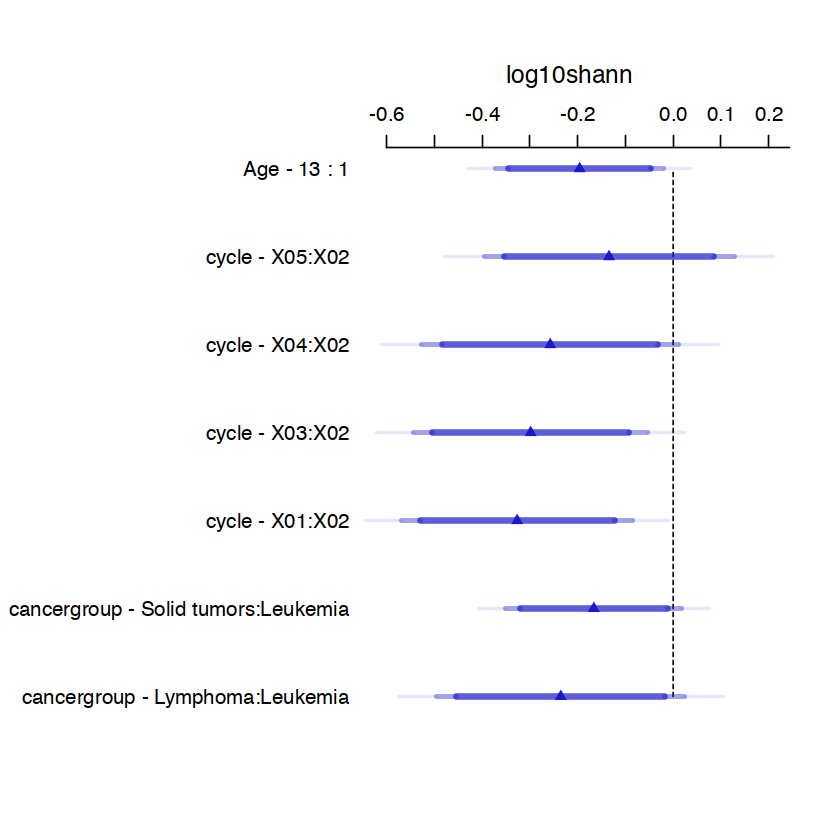

In [42]:
plot(summary(f))


In [43]:
tapply(pbmc$log10shann, pbmc$cycle, summary)

$X05
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2907  1.7967  2.0474  2.0252  2.4225  2.7837 

$X04
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9663  1.4801  1.9081  1.8814  2.2058  2.6821 

$X03
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2574  1.4312  1.8421  1.8213  2.3641  3.1838 

$X02
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.100   1.759   2.211   2.090   2.447   3.005 

$X01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.441   1.926   1.787   2.323   2.744 


In [44]:
f <- ols(log10shann ~ cycle + cancergroup + agegroup, data = pbmc)
f

Linear Regression Model

ols(formula = log10shann ~ cycle + cancergroup + agegroup, data = pbmc)

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs     188    LR chi2     24.10    R2       0.120    
sigma0.5725    d.f.           10    R2 adj   0.071    
d.f.    177    Pr(> chi2) 0.0074    g        0.233    

Residuals

    Min      1Q  Median      3Q     Max 
-1.7070 -0.3431  0.0428  0.3929  1.2648 


                     Coef    S.E.   t     Pr(>|t|)
Intercept             2.0794 0.1434 14.51 <0.0001 
cycle=X04            -0.1506 0.1469 -1.03 0.3065  
cycle=X03            -0.1879 0.1348 -1.39 0.1651  
cycle=X02             0.0999 0.1354  0.74 0.4617  
cycle=X01            -0.2416 0.1361 -1.78 0.0774  
cancergroup=Leukemia  0.1582 0.0960  1.65 0.1012  
cancergroup=Lymphoma -0.1278 0.1449 -0.88 0.3793  
agegroup=>= 18 yrs   -0.3183 0.1748 -1.82 0.0703  
agegroup=12-17 yrs   -0.1307 0.1296 -1.01 0.3145  
agegroup=2-4 yrs     

# scatterplots flow vs div

In [45]:
flowd <- meta_div[ which(meta_div$sampletype == "PBMC" & meta_div$CD3 > 0), ]

In [46]:
colnames(flowd)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "type"

In [47]:
p1 <- ggplot(flowd, aes(x = `Naïve%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col) +
    labs(y = "Total TRB (PBMC)")

p2 <- ggplot(flowd, aes(x = `SCM%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        axis.title.y = element_blank(),
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col)

p3 <- ggplot(flowd, aes(x = `CM%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        axis.title.y = element_blank(),
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col)

p4 <- ggplot(flowd, aes(x = `EM%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col) +
    labs(y = "Total TRB (PBMC)")

p5 <- ggplot(flowd, aes(x = `TE%`, y = TRB, color = cancergroup)) +
    geom_point() +
    #geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        axis.title.y = element_blank(),
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col)


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [48]:
allp <- cowplot::plot_grid(p1, p2, p3, p4, p5, align = "hv", axis = "tblr")

In [49]:
pdf(paste0(plotpath, "TRB_flow_PBMC.pdf"), width = 10, height = 12)
allp
dev.off()

pdf 
  2

In [50]:
flowd <- meta_div[ which(meta_div$sampletype == "cfDNA" & meta_div$CD3 > 0), ]

In [51]:
p1 <- ggplot(flowd, aes(x = `Naïve%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col) +
    labs(y = "Total TRB (cfDNA)")

p2 <- ggplot(flowd, aes(x = `SCM%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        axis.title.y = element_blank(),
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col)

p3 <- ggplot(flowd, aes(x = `CM%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        axis.title.y = element_blank(),
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col)

p4 <- ggplot(flowd, aes(x = `EM%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col) +
    labs(y = "Total TRB (cfDNA)")

p5 <- ggplot(flowd, aes(x = `TE%`, y = TRB, color = cancergroup)) +
    geom_point() +
    # geom_smooth(method = "lm", se = FALSE) +
    myplot +
    myaxis +
    theme(
        axis.title.y = element_blank(),
        strip.background = element_blank(),
        strip.text = element_text(size = 15),
        strip.placement = "outside",
        legend.position = "none",
        axis.text.x = element_text(angle = 0, hjust = 0.5),
        panel.border = element_rect(color = "black", fill = NA, size = 0.5)
    ) +
    scale_color_manual(values = group_col)


In [52]:
allp <- cowplot::plot_grid(p1, p2, p3, p4, p5, align = "hv", axis = "tblr")

In [53]:
mylgd <-  get_legend(p1 + 
theme(legend.position = 'right', legend.box = 'vertical', legend.margin = margin(0,0,0,0)) +
guides(colour = guide_legend(override.aes = list(size=3)))) 

In [54]:
pdf(paste0(plotpath, "TRB_flow_cfDNA.pdf"), width = 10, height = 12)
plot_grid(allp, mylgd, ncol = 2, rel_widths = c(1, .1))
dev.off()

pdf 
  2

### PBMC

In [55]:
table(pbmc$agegroup)


  < 2 yrs >= 18 yrs 12-17 yrs   2-4 yrs  5-11 yrs 
       49        16        50        21        52 

In [56]:
pbmc$agegroup <- factor(pbmc$agegroup, levels = c("< 2 yrs", "2-4 yrs", "5-11 yrs", "12-17 yrs", ">= 18 yrs"))

In [57]:
pbmc$Cyclegroup <- NA
pbmc$Cyclegroup[ pbmc$cycle == "X01"] <- "Baseline"
pbmc$Cyclegroup[ pbmc$cycle %in% c("X02", "X03")] <- "Early chemo"
pbmc$Cyclegroup[ pbmc$cycle %in% c("X04", "X05")] <- "Late chemo"

In [58]:
f <- ols(log10shann ~  agegroup + cancergroup, data = pbmc[pbmc$cycle == "X05",])
f


Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = pbmc[pbmc$cycle == 
    "X05", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      33    LR chi2      2.69    R2       0.078    
sigma0.5720    d.f.            6    R2 adj  -0.134    
d.f.     26    Pr(> chi2) 0.8467    g        0.165    

Residuals

     Min       1Q   Median       3Q      Max 
-1.61837 -0.24209  0.05198  0.35625  0.87467 


                     Coef    S.E.   t     Pr(>|t|)
Intercept             1.9069 0.2644  7.21 <0.0001 
agegroup=2-4 yrs      0.2102 0.3312  0.63 0.5311  
agegroup=5-11 yrs     0.0022 0.2567  0.01 0.9932  
agegroup=12-17 yrs    0.1848 0.3909  0.47 0.6403  
agegroup=>= 18 yrs    0.1875 0.4844  0.39 0.7018  
cancergroup=Leukemia  0.1572 0.2355  0.67 0.5104  
cancergroup=Lymphoma -0.2797 0.4140 -0.68 0.5052  


In [59]:
annotation_df <- data.frame(
  cycle = c("X01"),
  start = c("< 2 yrs"),
  end = c("12-17 yrs"),
  y = c(3),
  label = c("p = 0.04") )

In [60]:
p_pbmc <- baseplot.fx(pbmc, "agegroup", "log10shann", "cancergroup", group_col, "PBMC")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


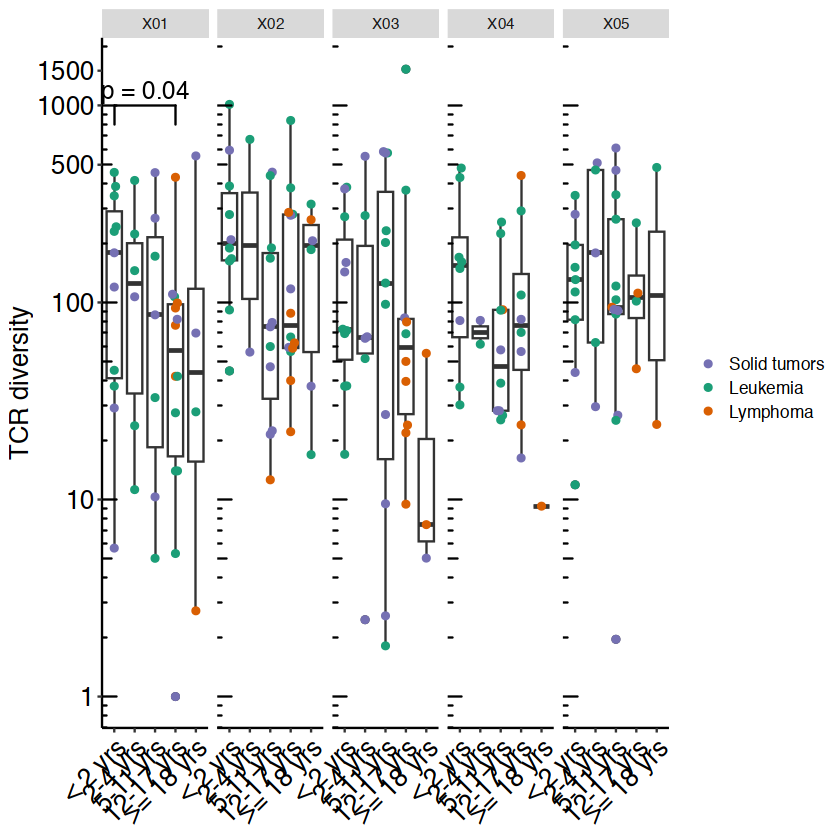

In [61]:
p_pbmc <- p_pbmc + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0,
    manual = TRUE
  ) +
facet_wrap(~cycle, nrow = 1) + 
labs( y = "TCR diversity")

p_pbmc

In [62]:
pdf(paste0(plotpath, "pbmc_shann_age_facet_cycle.pdf"), width = 12, height = 6)
p_pbmc + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

### cfDNA

In [36]:
table(cfdna$agegroup)


  < 2 yrs >= 18 yrs 12-17 yrs   2-4 yrs  5-11 yrs 
       49        25        77        45        70 

In [37]:
cfdna$agegroup <- factor(cfdna$agegroup, levels = c("< 2 yrs", "2-4 yrs", "5-11 yrs", "12-17 yrs", ">= 18 yrs"))

In [38]:
cfdna$Cyclegroup <- NA
cfdna$Cyclegroup[ cfdna$cycle == "X01"] <- "Baseline"
cfdna$Cyclegroup[ cfdna$cycle %in% c("X02", "X03")] <- "Early chemo"
cfdna$Cyclegroup[ cfdna$cycle %in% c("X04", "X05")] <- "Late chemo"

In [39]:
f <- ols(log10shann ~  agegroup + cancergroup, data = cfdna[cfdna$cycle == "X04",])
f


Linear Regression Model

ols(formula = log10shann ~ agegroup + cancergroup, data = cfdna[cfdna$cycle == 
    "X04", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      50    LR chi2     12.50    R2       0.221    
sigma0.4556    d.f.            6    R2 adj   0.113    
d.f.     43    Pr(> chi2) 0.0517    g        0.258    

Residuals

      Min        1Q    Median        3Q       Max 
-1.056772 -0.350704  0.007409  0.267044  1.219000 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 1.0568 0.1556  6.79 <0.0001 
agegroup=2-4 yrs         -0.2058 0.2289 -0.90 0.3736  
agegroup=5-11 yrs        -0.4497 0.2005 -2.24 0.0301  
agegroup=12-17 yrs       -0.3285 0.2055 -1.60 0.1172  
agegroup=>= 18 yrs       -0.2911 0.2779 -1.05 0.3007  
cancergroup=Lymphoma     -0.3166 0.1851 -1.71 0.0944  
cancergroup=Solid tumors -0.2252 0.1518 -1.48 0.1453  


In [40]:
annotation_df <- data.frame(
  cycle = c("X02", "X02", "X03", "X03", "X04"),
  start = rep("< 2 yrs", 5),
  end = c("2-4 yrs", ">= 18 yrs","5-11 yrs", ">= 18 yrs","5-11 yrs"),
  y = c(1.7, 1.9, 2.1, 2.3, 2.3),
  label = c("p = 0.05", "p = 0.004", "p = 0.01", "p = 0.05", "p = 0.03"))

In [41]:
p_cfdna <- baseplot.fx(cfdna, "agegroup", "log10shann", "cancergroup", group_col, "cfDNA")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


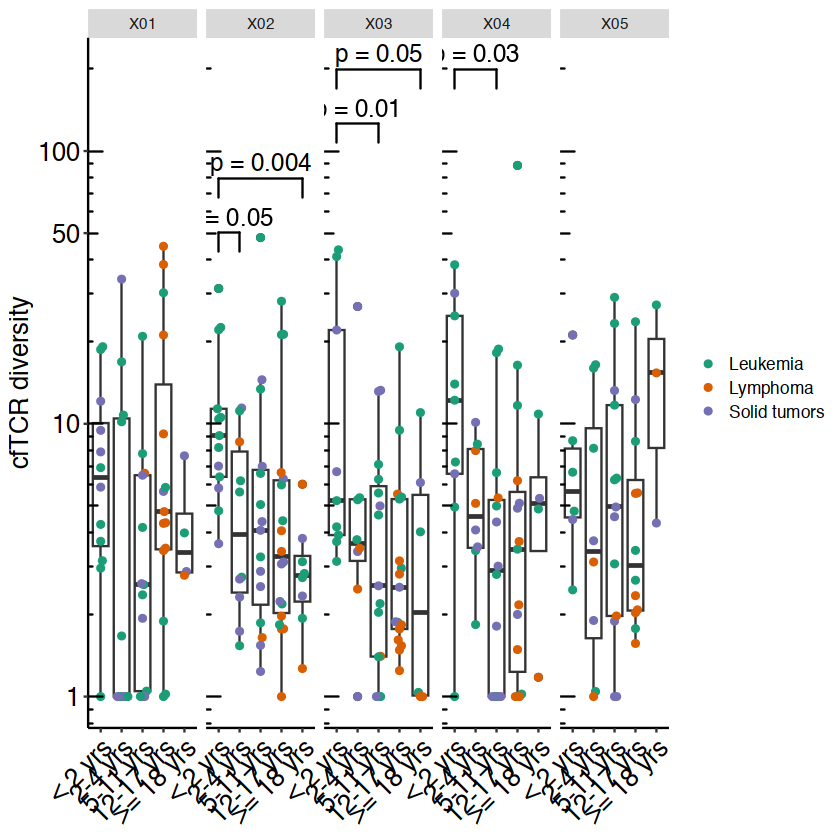

In [42]:
p_cfdna <- p_cfdna + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0,
    manual = TRUE
  ) +
facet_wrap(~cycle, nrow = 1) + 
labs( y = "cfTCR diversity")

p_cfdna

In [43]:
pdf(paste0(plotpath, "cfdna_shann_age_facet_cycle.pdf"), width = 12, height = 6)
p_cfdna + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

## Plots for cancer groups

### PBMC

In [44]:
f <- ols(log10shann ~  cancergroup + Age, data = pbmc[pbmc$cycle == "X05",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = pbmc[pbmc$cycle == 
    "X05", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      36    LR chi2      1.42    R2       0.039    
sigma0.5284    d.f.            3    R2 adj  -0.052    
d.f.     32    Pr(> chi2) 0.7017    g        0.114    

Residuals

      Min        1Q    Median        3Q       Max 
-1.692334 -0.187964 -0.002642  0.320536  0.796088 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 2.0915 0.1658 12.61 <0.0001 
cancergroup=Lymphoma     -0.2915 0.3033 -0.96 0.3438  
cancergroup=Solid tumors -0.1500 0.1991 -0.75 0.4566  
Age                       0.0046 0.0192  0.24 0.8117  


In [45]:
# annotation_df <- data.frame(
#   Cyclegroup = "Early chemo",
#   start = c("Leukemia","Leukemia"),
#   end = c("Lymphoma","Solid tumors"),
#   y = c(3.3,3.5),
#   label = c("p = 0.03", "p = 0.05") )

In [46]:
p_pbmc <- baseplot.fx(pbmc, "cancergroup", "log10shann", "cycle", rep("grey",5), "PBMC")

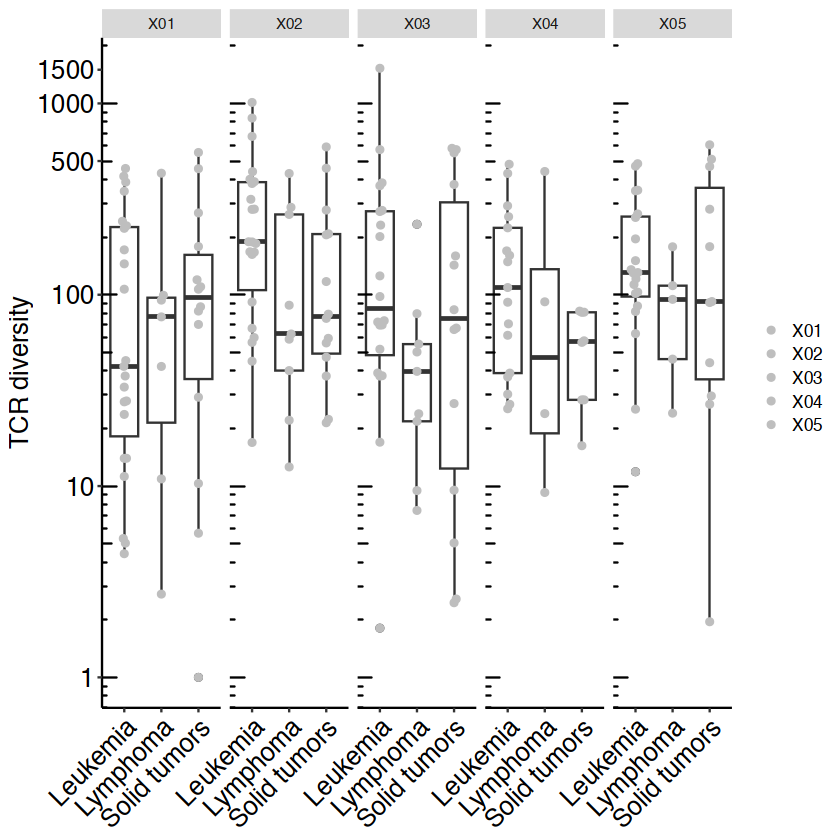

In [47]:
p_pbmc <- p_pbmc + 
# geom_signif(
#     data = annotation_df,
#     aes(xmin = start, xmax = end, annotations = label, y_position = y),
#     textsize = 5, vjust = 0, tip_length = 0.01,
#     manual = TRUE
#   ) +
facet_wrap(~cycle, nrow = 1) + 
labs( y = "TCR diversity")

p_pbmc

In [48]:
pdf(paste0(plotpath, "pbmc_shann_cancergroup_facet.pdf"), width = 12, height = 6)
p_pbmc + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2

### cfDNA

In [49]:
f <- ols(log10shann ~  cancergroup + Age, data = cfdna[cfdna$cycle == "X05",])
f

Linear Regression Model

ols(formula = log10shann ~ cancergroup + Age, data = cfdna[cfdna$cycle == 
    "X05", ])

                Model Likelihood    Discrimination    
                      Ratio Test           Indexes    
Obs      42    LR chi2      7.98    R2       0.173    
sigma0.4030    d.f.            3    R2 adj   0.108    
d.f.     38    Pr(> chi2) 0.0465    g        0.205    

Residuals

     Min       1Q   Median       3Q      Max 
-0.77753 -0.28513  0.02004  0.25927  0.79551 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                 0.7730 0.1234  6.26 <0.0001 
cancergroup=Lymphoma     -0.4408 0.1643 -2.68 0.0108  
cancergroup=Solid tumors -0.2534 0.1473 -1.72 0.0935  
Age                       0.0116 0.0118  0.98 0.3310  


In [50]:
annotation_df <- data.frame(
  cycle = c("X01","X02", "X02", "X03", "X05"),
  start = c("Leukemia","Leukemia", "Leukemia","Leukemia", "Leukemia"),
  end = c("Lymphoma", "Lymphoma", "Solid tumors", "Lymphoma","Lymphoma"),
  y = c(2, 2, 2.2, 2, 2.2),
  label = c("p = 0.04", "p = 0.02", "p = 0.008", "p = 0.02", "p = 0.01") )

In [51]:
p_cfdna <- baseplot.fx(cfdna, "cancergroup", "log10shann", "cycle", rep("grey",5), "cfDNA")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”


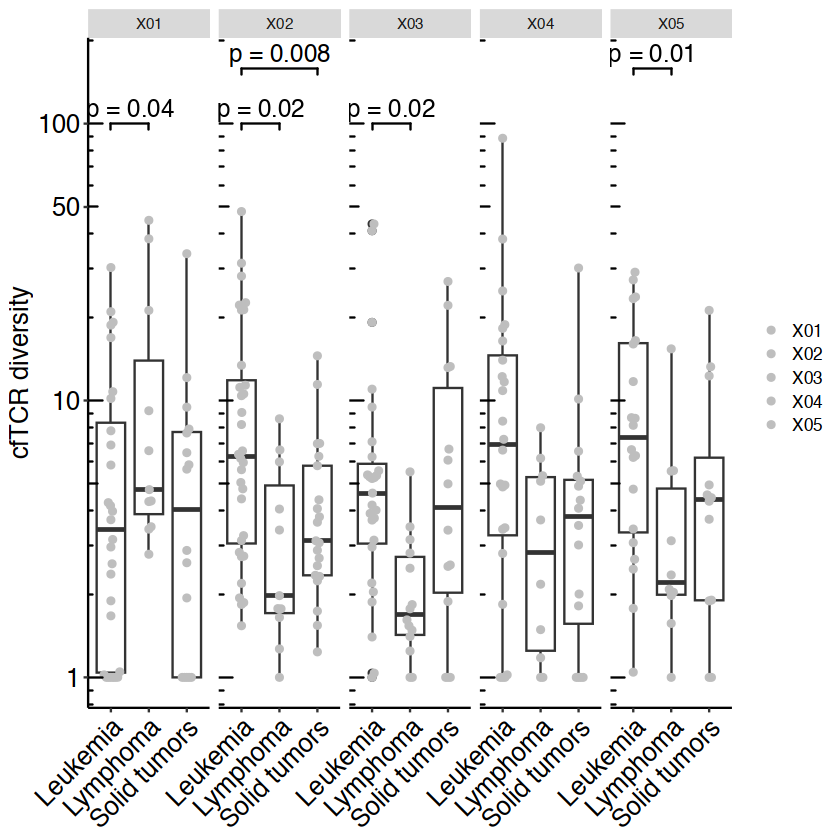

In [52]:
p_cfdna <- p_cfdna + geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0, tip_length = 0.01,
    manual = TRUE
  ) +
facet_wrap(~cycle, nrow = 1) + 
labs( y = "cfTCR diversity")

p_cfdna

In [53]:
pdf(paste0(plotpath, "cfdna_shann_cancergroup_facet.pdf"), width = 12, height = 6)
p_cfdna + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

pdf 
  2